# Density Estimation


## 1.1 Reading the Data
In the following section an Excel file containing mortality rate associated with the hypertensive heart disease in the United States across different age groups and sexes will be processed (Data was downloaded from WHO website). We will extract total mortality rate per year for male (1951 - 2019) and female (1951 - 2019) populations separately.   

In [6]:
import numpy as np
import pandas as pd

myData = np.array(pd.read_excel('Mortality_Hypertension_America.xlsx'))

# Extraxt total mortality for male population into a two dimensional array. 
# column 0: year, colomn 1: gender ('Male', column 2: yearly mortality
M = np.array([row[[1,2,5]] for row in myData if row[2] == 'Male' and row[3] == 'Age_all'])

# Extraxt total mortality for female population into a two dimensional array. 
# column 0: year, colomn 1: gender ('Female', column 2: yearly mortality
F = np.array([row[[1,2,5]] for row in myData if row[2] == 'Female' and row[3] == 'Age_all'])
F = F[1:,:] # Make sure data starts from year 1951

print(M.shape)
print(F.shape)
print(M)
print(F)

(69, 3)
(69, 3)
[[1951 'Male' 46214]
 [1952 'Male' 45285]
 [1953 'Male' 43742]
 [1954 'Male' 39685]
 [1955 'Male' 39006]
 [1956 'Male' 37932]
 [1957 'Male' 37708]
 [1958 'Male' 39014]
 [1959 'Male' 36395]
 [1960 'Male' 35242]
 [1961 'Male' 33369]
 [1962 'Male' 32950]
 [1963 'Male' 32715]
 [1964 'Male' 30715]
 [1965 'Male' 29679]
 [1966 'Male' 29210]
 [1967 'Male' 27125]
 [1968 'Male' 12418]
 [1969 'Male' 11499]
 [1970 'Male' 10711]
 [1971 'Male' 10004]
 [1972 'Male' 9684]
 [1973 'Male' 9204]
 [1974 'Male' 8599]
 [1975 'Male' 7637]
 [1976 'Male' 7461]
 [1977 'Male' 7148]
 [1978 'Male' 6963]
 [1979 'Male' 13786]
 [1980 'Male' 13943]
 [1981 'Male' 13822]
 [1982 'Male' 13550]
 [1983 'Male' 13803]
 [1984 'Male' 13478]
 [1985 'Male' 13507]
 [1986 'Male' 13034]
 [1987 'Male' 13382]
 [1988 'Male' 13399]
 [1989 'Male' 13648]
 [1990 'Male' 13614]
 [1991 'Male' 13947]
 [1992 'Male' 14520]
 [1993 'Male' 15306]
 [1994 'Male' 15915]
 [1995 'Male' 16660]
 [1996 'Male' 17291]
 [1997 'Male' 17856]
 [19

## 1.2 Histograms

We can use histograms to explore sample data distribution. A histogram divides the variable into bins, counts the data points in each bin, and shows the bins on the x-axis and the counts on the y-axis. The binwidth defines the shape of sample distribution. 
Generate two histograms using the male mortality data, one with 10 bins and another with 20 bins. Display binwidth for each case.


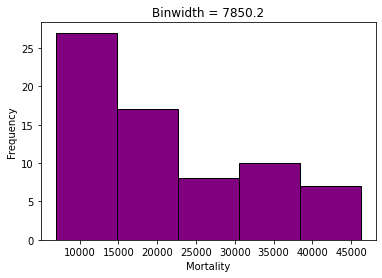

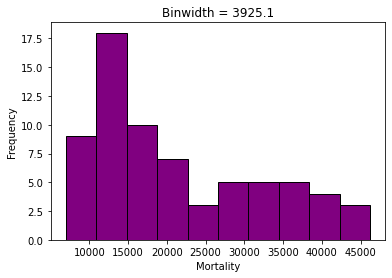

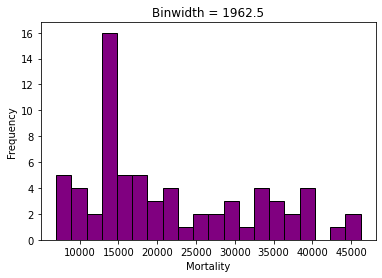

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

# data should be a float numpy array

data = np.array(M[:,2].astype(float))


# histogram plot with 5 bins
fig1 = plt.hist(data,bins = 5, color='purple', edgecolor='black')

plt.xlabel('Mortality')
plt.ylabel('Frequency')
plt.title(f'Binwidth = {fig1[1][1] - fig1[1][0]:.1f}')

plt.show()


# histogram plot with 10 bins
fig2 = plt.hist(data,bins = 10, color='purple', edgecolor='black')

plt.xlabel('Mortality')
plt.ylabel('Frequency')
plt.title(f'Binwidth = {fig2[1][1] - fig2[1][0]:.1f}')

plt.show()


# histogram plot with 20 bins
fig3 = plt.hist(M[:,2].astype(float),bins = 20, color='purple', edgecolor='black')
plt.xlabel('Mortality')
plt.ylabel('Frequency')
plt.title(f'Binwidth = {fig3[1][1] - fig3[1][0]:.1f}')
plt.show()



## 1.3 Kernel Density Estimation

In statistics **kernel density estimation (KDE)** is used to perform probability density estimation of random variables based on kernels as weights.

Assuming $(x_{1}, x_{2} , \dots, x_{n})$ are independant and identically distributed samples drawn from some univariate distribution with unkown density, we are interested in estimating the shape of this unkown density function $f$ using the following formula:

$f_K(x) = \frac{1}{n} \sum_{i = 1}^{n} K(x - x_{i};h) = \frac{1}{nh} \sum_{i = 1}^{n} K(\frac{x - x_{i}}{h})$

Here $K$ is a kernel which is a non negative function and $h \gt 0$ is a called bandwidth and works as smoothing parameter. The bandwidth controls the tradeoff between bias and variance in the density estimation. 

A few examples of the kernels are:

- Gaussian: $K(x;h) \propto e^{(-\frac{x^{2}}{2h^{2}})}$
- Tophat: $K(x;h) \propto 1 \text{ if } x \lt h$
- Epanechnikov: $K(x;h) \propto 1 - \frac{x^{2}}{h^{2}}$ with $|\frac{x}{h}| \le 1$

Write your own code (DO NOT use available packages) to generate a Gaussian KDE based on the male mortality sample data. Generate 300 samples for kernel density estimation with uniform samples between 0 amd max value in your data + 10,000. Use different bandwidths. Show your results by superimposing the KDE result on the normalized histogram with 10 bins.

Write your own code (DO NOT use available packages) to generate a Epanechnikov KDE based on the male mortality sample data. Generate 300 samples for kernel density estimation with uniform samples between 0 amd max value in your data + 10,000. Use different bandwidths. Show your results by superimposing the KDE result on the normalized histogram with 10 bins.

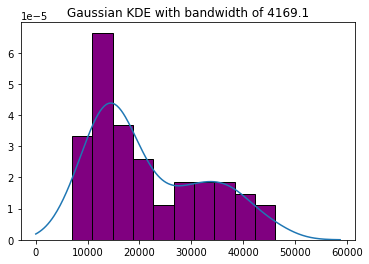

Area under KDE : 0.9966227795746673 


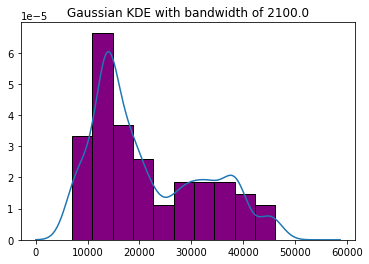

Area under KDE : 0.999983206739822 


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

data = M[:,2].astype(float)

def gaussian(x,h):
    
    return np.exp(-(x**2)/(2*(h**2)))*(1/(h*np.sqrt(2*np.pi)))

# silverman's rule of thumb for bandwidth
q75, q25 = np.percentile(data, [75 ,25])
iqr = q75 - q25
h_silver = 0.9 * np.min([np.std(data, ddof = 1), iqr/1.34]) *(len(data)**(-1/5))

# Generate 300 samples for kernel density estimation between 0 amd max value + 10,
# max of the data + 3*h_silver is used to make sure the plot is not cut off

sample_array = np.linspace(0, np.max(data)+3*h_silver,300)
result1 = np.array([np.sum(gaussian(x-data,h_silver))/(len(data)) for x in sample_array])

# normalized histogram
fig1 = plt.hist(data,bins = 10, color='purple', edgecolor='black',density=True)

plt.plot(sample_array,result1)
plt.title(f'Gaussian KDE with bandwidth of {h_silver:.1f}')
plt.show()
print(f"Area under KDE : {np.trapz(result1, sample_array)} ")

# Use smaller bandwidth
h = 2100
result2 = np.array([np.sum(gaussian(x-data,h))/(len(data)) for x in sample_array])


fig2 = plt.hist(data,bins = 10, color='purple', edgecolor='black',density=True)

plt.plot(sample_array,result2)
plt.title(f'Gaussian KDE with bandwidth of {h:.1f}')
plt.show()

print(f"Area under KDE : {np.trapz(result2, sample_array)} ")





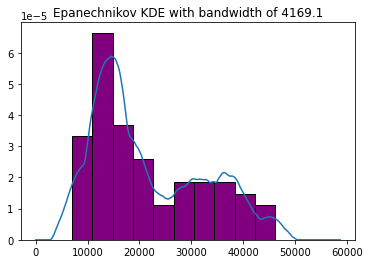

Area under KDE : 1.0000002026403556 


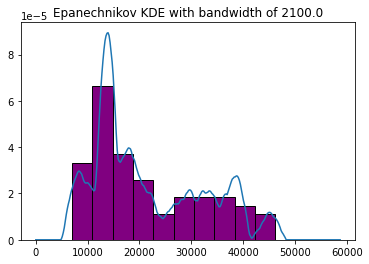

Area under KDE : 1.000014006191049 


In [9]:


# Epanechnikov KDE

def Epanechnikov(x,h):
    
    return (3/4) * np.array(list(map(lambda i: np.max([1 - ((i/h)**2), 0]),  x)))


result3 = np.array([np.sum(Epanechnikov(x-data,h_silver))/(len(data)*h_silver) for x in sample_array])


fig3 = plt.hist(data,bins = 10, color='purple', edgecolor='black',density=True)

plt.plot(sample_array,result3)
plt.title(f'Epanechnikov KDE with bandwidth of {h_silver:.1f}')
plt.show()

print(f"Area under KDE : {np.trapz(result3, sample_array)} ")


h = 2100

result4 = np.array([np.sum(Epanechnikov(x-data,h))/(len(data)*h) for x in sample_array])


fig3 = plt.hist(data,bins = 10, color='purple', edgecolor='black',density=True)

plt.plot(sample_array,result4)
plt.title(f'Epanechnikov KDE with bandwidth of {h:.1f}')
plt.show()

print(f"Area under KDE : {np.trapz(result4, sample_array)} ")




## 1.4 Bivariate Kernel Density Estimation

The concept of univariate KDE can be extended to multivariate data. In this example we gerenate bivariate KDE for a set of two dimensional random variables in Oxford, UK: 

- Monthly maximum temprature
- Monthly sunshine duration



In [10]:
# Reading Data
import pandas as pd

# read oxford weather information
weather = pd.read_excel('oxforddata.xlsx')

# Extraxt data for the month of June across all the years
June = weather[weather['month'] == 6]
# Extract tmax and sun duration
June_t_sun = np.array(June[['tmax (degC)', 'sun (hours)']], dtype= 'float')


# print the first 5 rows
print(June_t_sun)

[[ 18.9 210.3]
 [ 21.1 211.2]
 [ 19.5 158.7]
 [ 19.2 199.3]
 [ 21.4 226.9]
 [ 21.1 192.7]
 [ 20.  196.3]
 [ 20.  166.2]
 [ 20.  181.3]
 [ 20.3 190.6]
 [ 19.5 227.9]
 [ 22.6 273.4]
 [ 21.  210.3]
 [ 21.5 234. ]
 [ 20.1 192.9]
 [ 19.  170.3]
 [ 19.7 182.4]
 [ 18.1 149.8]
 [ 21.5 185.9]
 [ 18.5 124.2]
 [ 21.6 242.1]
 [ 22.1 244.5]
 [ 19.7 251.9]
 [ 20.5 217.6]
 [ 18.7 139.7]
 [ 17.9 157.1]
 [ 19.3 155.3]
 [ 17.9 145. ]
 [ 22.2 297.1]
 [ 19.1 145.7]
 [ 21.  226.3]
 [ 21.8 274.9]
 [ 20.9 231.2]
 [ 19.8 280.3]
 [ 19.9 199.4]
 [ 18.6 156.1]
 [ 19.1 188.7]
 [ 20.8 199. ]
 [ 19.5 232. ]
 [ 19.9 206.6]
 [ 19.9 276.9]
 [ 22.4 270.9]
 [ 16.7 143.5]
 [ 16.6 150.4]
 [ 20.9 249.5]
 [ 19.1 206.2]
 [ 21.5 301. ]
 [ 24.4 261.4]
 [ 16.7 123.2]
 [ 19.1 171.7]
 [ 19.  166.6]
 [ 19.  186.7]
 [ 18.1 122.8]
 [ 21.3 148.4]
 [ 19.6 180.3]
 [ 20.8 244.3]
 [ 17.5 165. ]
 [ 20.6 222.7]
 [ 17.8 129.3]
 [ 18.7 142.3]
 [ 20.8 244.4]
 [ 18.2 121.1]
 [ 16.8 150. ]
 [ 21.4 212.2]
 [ 20.7 231.4]
 [ 20.6 254.9]
 [ 20.  19

Write your own code to implement bi-variate product kernel estimator for estimating distribution of maximum temprature againt sun duraion variables for the month of June in Oxford, UK. Disply 3D bar histogram (standardized) od these variables. You can use 15 bins. Set the temprature range to 5 - 35 deg C and sun duration to 100 - 400 hours range. The product kernel estimator takes the following form:

$\hat{f}(x,y) = \frac{1}{nh_{x}h_{y}} \sum_{i=1}^{n} K(\frac{x_{i} - x}{h_{x}})K(\frac{y_{i} - y}{h_{y}})$

where 

$K(t) = \frac{1}{\sqrt{2\pi}}e^{-\frac{t^{2}}{2}}$

$h_{x}$ and $h_{y}$ are bandwidths and $n$ is the number samples in paired data ($x_{i},y_{i}$).

Generate 100 uniform samples for temrature data in the range of 5 - 35 and another 100 uniform sample for the sun duration in the range of 100 - 400 hours. Calculate the bi-variate KDE based on the equation above and display the surface plot.


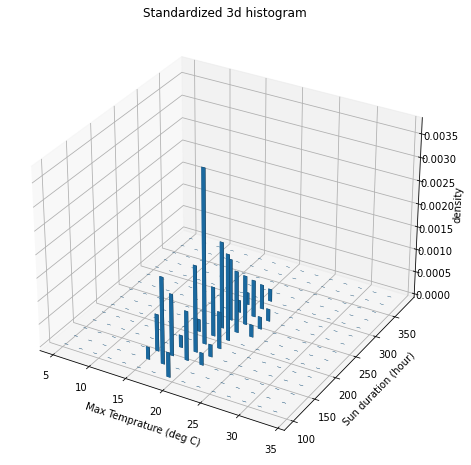

In [11]:
%matplotlib inline
from matplotlib import cm
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(0)

# display 2d histogram in 3d space 
fig = plt.figure(figsize =(10, 8))
ax = fig.add_subplot(projection='3d')
x = June_t_sun[:,0]
y = June_t_sun[:,1]
hist, xedges, yedges = np.histogram2d(x, y, bins=15, range=[[5, 35], [100, 400]],density=True)

# Construct arrays for the anchor positions of the bins x bins  bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the all bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
ax.set_xlabel('Max Temprature (deg C)')
ax.set_ylabel('Sun duration (hour)')
ax.set_zlabel('density')
ax.set_title('Standardized 3d histogram')

plt.show()




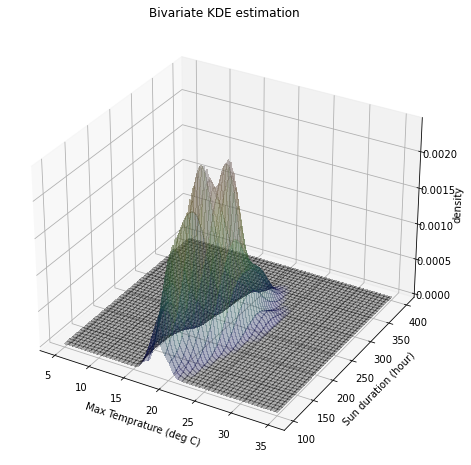

In [12]:



def gaussian2d(x1,x2,h1,h2):
    
    return np.exp(-(x1**2)/(2*(h1**2)))*(1/(h1*np.sqrt(2*np.pi))) * np.exp(-(x2**2)/(2*(h2**2)))*(1/(h2*np.sqrt(2*np.pi)))

# Generate n1 samples for kernel density estimation between 5 amd 35 for temprature
n1 = 100
temp_array = np.linspace(5, 35,n1)
# Generate n1 samples for kernel density estimation between 100 amd 400 for sun duration
sun_array = np.linspace(100, 400,n1)

# temperature bandwidth 0.5 deg C
h1 = 0.5
# sun duration bandwidth 20 hours
h2 = 20



kde_2d = np.zeros((n1,n1))

x_size = np.size(x)
y_size = np.size(y)


for i, x1 in enumerate(temp_array):
 
    for j, y1 in enumerate(sun_array):
        
        kde_2d[i,j] = np.sum(gaussian2d(x1-x,y1-y, h1,h2))/(x_size)
        

fig2 = plt.figure(figsize =(10, 8))
ax2 = fig2.add_subplot(projection='3d')

Y,X = np.meshgrid(sun_array,temp_array)

ls = LightSource(27, 145)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
rgb = ls.shade(kde_2d, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
surf = ax2.plot_surface(X, Y, kde_2d, rstride=2, cstride=2,facecolors=rgb,
                       linewidth=0, antialiased=False, alpha = 0.3)

ax2.set_xlabel('Max Temprature (deg C)')
ax2.set_ylabel('Sun duration (hour)') 
ax2.set_zlabel('density')

ax2.set_title('Bivariate KDE estimation')

plt.show()
        
